# Node2Vec

In [1]:
"""
@author: vatsal
"""

import networkx as nx
import pandas as pd
import random
import matplotlib.pyplot as plt

from node2vec import Node2Vec as n2v
from itertools import combinations, groupby

## Generate Data

## Create Graph

In [2]:
def generate_graph(n, p, dt = nx.MultiGraph()):
    '''
    This function will generate a graph G based on the users input parameters
    
    params:
        n (Integer) : The number of nodes you would like in the graph
        p (Float) : The probability of adding an edge between nodes
        dt (Function) : The type of the graph you want to create
    '''
    edges = combinations(range(n), 2)
    G = dt
    G.add_nodes_from(range(n))
    
    if p <= 0:
        return G
    elif p >= 1:
        return nx.complete_graph(n, create_using = G)
    else:
        for _, ne in groupby(edges, key = lambda x : x[0]):
            ne = list(ne)
            re = random.choice(ne)
            G.add_edge(*re)
            for e in ne:
                if random.random() < p:
                    G.add_edge(*e)
    return G

In [3]:
G = generate_graph(n = 1000, p = 0.2, dt = nx.MultiGraph())

In [4]:
print(nx.info(G))

Name: 
Type: MultiGraph
Number of nodes: 1000
Number of edges: 100703
Average degree: 201.4060


## Node2Vec

**Parameter Info**  
- graph: a graph g, where all nodes must be integers or strings  
- dimensions: embedding dimensions (default: 128)  
- walk_length: number of nodes in each walk (default: 80)  
- num_walks: number of walks per node (default: 10)  
- weight_key: the key for the weight attribute on weighted graphs (default: 'weight')  
- workers: number of workers for parallel execution (default: 1)

Node2Vec.fit method: Accepts any key word argument acceptable by gensim.Word2Vec

In [5]:
%time g_emb = n2v(G, dimensions=16, weight_key='weight')

Computing transition probabilities:   0%|          | 0/1000 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:26<00:00,  2.69s/it]

CPU times: user 2min 1s, sys: 866 ms, total: 2min 2s
Wall time: 2min 2s


In [6]:
WINDOW = 1 # Node2Vec fit window
MIN_COUNT = 1 # Node2Vec min. count
BATCH_WORDS = 4 # Node2Vec batch words

In [7]:
mdl = g_emb.fit(
    window=WINDOW,
    min_count=MIN_COUNT,
    batch_words=BATCH_WORDS
)

## Convert to DataFrame

In [8]:
emb_df = (
    pd.DataFrame(
        [mdl.wv.get_vector(str(n)) for n in G.nodes()],
        index = G.nodes
    )
)

In [9]:
emb_df.iloc[:,1:]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.226502,-0.211847,0.644111,-0.358611,0.148104,-0.014680,-0.220751,-0.110541,-0.027361,-0.255105,0.086395,-0.202727,-0.557303,0.658026,1.226859
1,0.391921,-0.573143,0.476740,0.279696,0.784906,0.574834,-0.404991,-0.424174,0.512730,0.163914,-0.135566,0.506348,-0.205397,-0.043155,0.679659
2,0.376249,0.415336,0.535406,0.183781,0.182102,-0.664114,-0.188033,-0.353186,-0.376917,0.008736,0.067576,0.255571,-0.340943,0.631104,0.561723
3,-0.396323,0.115208,0.346808,0.262662,0.749367,-0.104065,-0.824087,-0.570808,-0.016596,-0.499936,-0.106407,-0.404643,-0.322290,-0.248379,0.332692
4,-0.208156,-0.196942,0.237939,0.325842,0.198640,-0.043904,-0.430298,-0.056992,0.005844,0.176740,-0.039079,0.103578,-0.282276,0.133959,0.482354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.500024,0.046386,0.577496,0.771788,-0.170868,-0.476977,-0.454487,-0.181476,0.522834,0.021548,-0.117279,0.106316,-0.724775,-0.023176,0.174362
996,-0.321921,0.292105,0.241259,0.124347,0.280910,0.131588,-0.408095,-0.117774,-0.235937,0.513188,0.393203,0.084254,-0.645338,0.919866,0.562015
997,-0.401122,0.478717,0.346187,-0.134456,0.894483,-0.373294,0.097073,-0.090185,0.274100,1.112041,0.075864,-0.040018,-0.159505,0.508538,0.194977
998,-0.452997,0.086729,0.332732,0.651461,-0.064761,-0.428211,-0.400554,-0.326055,0.149431,0.205122,-0.289352,-0.026052,-0.550845,0.637100,0.056229


### Visualize Embedding

<Figure size 432x288 with 0 Axes>

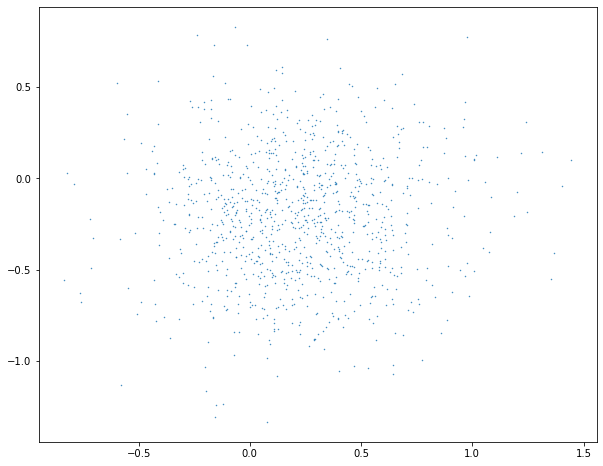

In [10]:
plt.clf()
fig=plt.figure(figsize=(10,8))
plt.scatter(
    x = emb_df.iloc[:,0],
    y = emb_df.iloc[:,1],
    s = 0.2
)
plt.show()
